## Climate visualizations data

## [Climate tipping points](https://www.nature.com/articles/d41586-019-03595-0)

Sources:
Climate tipping points\ Greenland melting\ Sea level rise\ Impacts at 4ºC

### Projected Emmissions of CO2
Latest report is IPCC 2014 Fifth Assesment Report (AR5)\
Data for RCP4.5, RCP6.0, RCP8.5 (Representative concentration pathways) from the [IPCC data portal](https://tntcat.iiasa.ac.at:8743/RcpDb/dsd?Action=htmlpage&page=download)\
(We need temperature data, not emissions)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [574]:
rcp4 =pd.read_csv(f"../../../../../Earth_Dashboard/RCP45_MIDYR_CONC.DAT" ,
                  skiprows=39, usecols=[0,1,2,3],
                  sep='     ',
                  names=['YEARS','CO2EQ','KYOTO-CO2EQ','CO2']) #6 spaces


rcp6 =pd.read_csv(f"../../../../../Earth_Dashboard/RCP6_MIDYR_CONC.DAT" ,
                  skiprows=39, usecols=[0,1,2,3],
                  sep='     ',
                  names=['YEARS','CO2EQ','KYOTO-CO2EQ','CO2']) #6 spaces

rcp8 =pd.read_csv(f"../../../../../Earth_Dashboard/RCP85_MIDYR_CONC.DAT" ,
                  skiprows=39, usecols=[0,1,2,3],
                  sep='     ',
                  names=['YEARS','CO2EQ','KYOTO-CO2EQ','CO2']) #6 spaces

### Data descriptions
# 1. CO2EQ            - CO2 equivalence concentrations using CO2 radiative forcing relationship Q = 3.71/ln(2)*ln(C/278), aggregating all anthropogenic forcings, including greenhouse gases listed below (i.e. columns 3,4,5 and 8-35), and aerosols, trop. ozone etc. (not listed below).
# 2. KYOTO-CO2EQ      - As column 1, but only aggregating greenhouse gases controlled under the Kyoto Protocol (columns 3,4,5 and 8-19).
# 3. CO2              - Atmospheric CO2 concentrations

/Users/tamarahuete/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
/Users/tamarahuete/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()
/Users/tamarahuete/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid thi

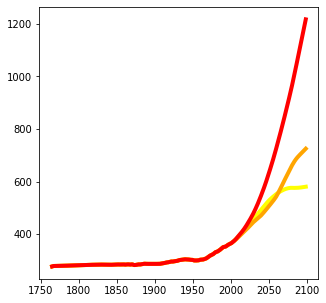

In [74]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
#rcp4.5
ax.plot(rcp4[rcp4['YEARS'] < 2100].YEARS,rcp4[rcp4['YEARS'] < 2100].CO2EQ,color='yellow',linewidth=4)

#rcp6
ax.plot(rcp6[rcp6['YEARS'] < 2100].YEARS,rcp6[rcp6['YEARS'] < 2100].CO2EQ,color='orange',linewidth=4)

#rcp8.5
ax.plot(rcp8[rcp8['YEARS'] < 2100].YEARS,rcp8[rcp8['YEARS'] < 2100].CO2EQ,color='red',linewidth=4)

plt.show()

### Historical temperature from RW data
Dataset id= 'c8a973d1-7600-4950-aded-9ef74cfe3080'

In [1]:
temp =pd.read_csv(f"../../../../../Earth_Dashboard/temperature_rise.csv").drop(columns='Unnamed: 0')
temp['x'] =pd.to_datetime(temp['x']).dt.year #1880 - 2019

In [2]:
fig, ax = plt.subplots(figsize=(5, 5))
#rcp4.5
ax.plot(temp.x,temp.y,color='steelblue',linewidth=4)
plt.show()

<Figure size 500x500 with 1 Axes>

### Get climate data from [World data Bank](https://climateknowledgeportal.worldbank.org/download-data#)
The Climate Change portal has data of historical temperature as well as projections for each of the 4 scenarios (2.6,4.5,6,8.5) by country for block of 20 years (2020-2039, 2040-2059, 2060-2079, 2080-2099). The data has the results for each model and the ensembles, which considers the avergae anomaly of the 35 models. The approach followed is to download the data of each country for a given scenario, add a weight according to the surface of the country with respect to the total terrestrial surface (the sum of all the countries considered) and make a weighed average for each ensemble (10th percentile, 50th percentil and 90th percentile)

### 1. Country areas

In [7]:
#land area km2
land =pd.read_csv(f"../../../Earth_Dashboard/API_AG.LND.TOTL.K2_DS2_en_csv_v2_1496978.csv",skiprows=4)
land.head()
area_2018 =land[['Country Name','Country Code','2018']]

In [8]:
## ISO3 codes for request
area_2018['Country_request'] = area_2018.apply(lambda x: f'{x["Country Code"]}/{x["Country Name"]}',axis=1)
area_2018 =area_2018.dropna()
area_2018

/Users/tamarahuete/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country Name,Country Code,2018,Country_request
0,Aruba,ABW,180.0,ABW/Aruba
1,Afghanistan,AFG,652860.0,AFG/Afghanistan
2,Angola,AGO,1246700.0,AGO/Angola
3,Albania,ALB,27400.0,ALB/Albania
4,Andorra,AND,470.0,AND/Andorra
...,...,...,...,...
258,Samoa,WSM,2830.0,WSM/Samoa
260,"Yemen, Rep.",YEM,527970.0,"YEM/Yemen, Rep."
261,South Africa,ZAF,1213090.0,ZAF/South Africa
262,Zambia,ZMB,743390.0,ZMB/Zambia


### 2. Temperature data

In [ ]:
## PROJECTION SCENARIOS
## Ensemble values were calculated from the anomalies from each of the models in the collection, 
## and for every 20-year climatological period in the future. These ensembles describe how the 
## collection of up to 35 CMIP5 models on average project the climatological changes
## https://climateknowledgeportal.worldbank.org/themes/custom/wb_cckp/resources/data/CCKP_Metadata_Description_2018.pdf

import requests
import json
import io

years=['2020_2039','2040_2059','2060_2079','2080_2099']
country_list = list(area_2018['Country_request'])
onecountry = pd.DataFrame()

for country in country_list:
    for year in years:
        try:
            # Get data from World Data Bank API
            #url = f'https://climateknowledgeportal.worldbank.org/api/data/get-download-data/projection/mavg/tas/rcp85/{year}/{country}'
            url = f'https://climateknowledgeportal.worldbank.org/api/data/get-download-data/projection/mavg/tas/rcp60/{year}/{country}'
            urlData = requests.get(url).content
            rawData = pd.read_csv(io.StringIO(urlData.decode('utf-8')))
            
            # Select models (Ensemble)
            ensembles = [' Ensemble (10th Percentile)',' Ensemble (50th Percentile)',' Ensemble (90th Percentile)']
            rawData = rawData[rawData[' Model'].isin(ensembles)] 
            
            # Get annual mean
            avgModel =rawData.groupby(' Model').mean()
            avgModel.rename(columns={'Temperature - (Celsius)':'TempC'})
            avgModel['Year']=rawData[' Year'].unique()[0]
            avgModel['ISO3']=rawData[' ISO3'].unique()[0]
            avgModel['top_year']= year[-4:]
            
            # Add to general table
            onecountry = onecountry.append(avgModel) 
        except:
            print(f'{country} not in World data Bank')  

In [613]:
# Save file
onecountry = onecountry.reset_index()
onecountry.to_csv(f"../../../../../Earth_Dashboard/temperature_projections_WDB_RCP60.csv")

### 3. Weighed mean for each period considering each countries area

In [5]:
#onecountry= pd.read_csv(f"../../../Earth_Dashboard/temperature_projections_WDB_RCP85.csv")
onecountry= pd.read_csv(f"../../../Earth_Dashboard/temperature_projections_WDB_RCP60.csv")

In [9]:
# Match the countries in both datasets
print(f'Climate data has {len(onecountry.ISO3.unique())} countries') #197
print(f'Area data has {len(area_2018)} countries')
onecountry['ISO3'] = onecountry.apply(lambda x: f'{x["ISO3"][-3:]}',axis=1)
print(f'The missing countries are {len(set(area_2018["Country Code"].unique())-(set(onecountry.ISO3.unique())))}')  
print(f'Both datasets have {len(set(area_2018["Country Code"].unique()) & (set(onecountry.ISO3.unique())))} in common')  

Climate data has 195 countries
Area data has 256 countries
The missing countries are 61
Both datasets have 195 in common


In [627]:
# | union : elements in one or both of the sets
# & intersection : only elements common to both sets
# - difference : elements in the left hand set that are not in the right hand set
# ^ symmetric difference : elements in either set but not in both.

In [10]:
# Filter areas (eliminate non matching countries)
area_2018_fil = area_2018[area_2018["Country Code"].isin(onecountry.ISO3.unique())]
set(onecountry.ISO3.unique()) - set(area_2018_fil["Country Code"].unique())
onecountry=onecountry[~onecountry['ISO3'].isin(['MCO','SDN'])]
len(onecountry.ISO3.unique()) #195
area_2018_fil = area_2018[area_2018["Country Code"].isin(onecountry.ISO3.unique())]
len(area_2018_fil["Country Code"].unique()) #195

195

In [11]:
# Get a weiged value for each country based on their area 
# Assumption: the total terrestrial area is the sum of all area and the weight is country_area/total_area
area_2018_fil
area_2018_fil['weight']= area_2018_fil["2018"]/(area_2018_fil["2018"].sum())
area_2018_fil.weight.sum()

/Users/tamarahuete/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


1.0

In [12]:
#Sum of variables(weight)/sum of all weights = weighted average.
onecountry['weight']= 0
for country in onecountry.ISO3.unique():  
    onecountry.loc[onecountry['ISO3'] ==country,'weight'] = list(area_2018_fil[area_2018_fil["Country Code"]==country]['weight'])[0]                                                                                                                        

In [13]:
# Add weight to Climate dataset and calculate weighed mean
import numpy as np
wmean = pd.DataFrame()
ensembles = [' Ensemble (10th Percentile)',' Ensemble (50th Percentile)',' Ensemble (90th Percentile)']
years=[2039,2059,2079,2099]
for  model in ensembles:
    for year in years:
        values = list(onecountry.loc[(onecountry[' Model'] == model) & (onecountry['top_year'].astype(int) == year),'Monthly Temperature - (Celsius)'])
        weights = list(onecountry.loc[(onecountry[' Model'] == model) & (onecountry['top_year'].astype(int) == year),'weight'])
        weighted_average = sum(weight * value for weight, value in zip(weights, values)) / sum(weights)
        wmean = wmean.append([(model,year,weighted_average)])
wmean = wmean.rename(columns={wmean.columns[0]:'model',wmean.columns[1]:'year',wmean.columns[2]:'wavg_terrestrial_C'})

### 4. Merge with historical data and interpolate

In [14]:
### Merge with historical data
temp =pd.read_csv(f"../../../Earth_Dashboard/temperature_rise.csv").drop(columns='Unnamed: 0')
temp['x'] =pd.to_datetime(temp['x']).dt.year #1880 - 2019

In [15]:
### Interpolate using the last value of 2019
last_historical =[pd.Series([' Ensemble (90th Percentile)', 2019 , temp.loc[temp['x']==2019,'y'].values[0]],index=wmean.columns),
                  pd.Series([' Ensemble (10th Percentile)', 2019 , temp.loc[temp['x']==2019,'y'].values[0]],index=wmean.columns),
                  pd.Series([' Ensemble (50th Percentile)', 2019 , temp.loc[temp['x']==2019,'y'].values[0]],index=wmean.columns)]

projections = wmean
projections = projections.append(last_historical,ignore_index=True)
projections = projections.sort_values('year')
init_year =2019
end_year=2090
new_x = np.linspace(init_year, end_year, (end_year-init_year)+1)
interp = pd.DataFrame()
for model in ensembles:
    new_y = np.interp(new_x, 
                  [2019,2030,2050,2070,2090], 
                  projections.loc[projections['model']==model,'wavg_terrestrial_C'])
    new =pd.DataFrame({'year': new_x, 'temp': new_y,'model':model})
    interp= interp.append(new)

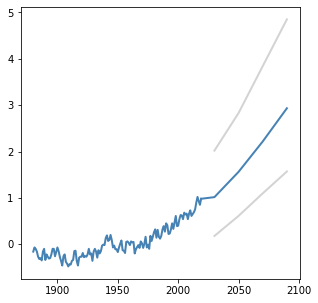

In [32]:
fig, ax = plt.subplots(figsize=(5, 5))
#historical
ax.plot(temp.x,temp.y,color='steelblue',linewidth=2)
#8.5 RCP AR5
ax.plot(interp.loc[interp['model']==' Ensemble (50th Percentile)','year'],
        interp.loc[interp['model']==' Ensemble (50th Percentile)','temp'],
        color='steelblue',linewidth=2)
ax.plot(interp.loc[(interp['model']==' Ensemble (10th Percentile)') & (interp['year']> 2029),'year'],
        interp.loc[(interp['model']==' Ensemble (10th Percentile)') & (interp['year']> 2029),'temp'],
        color='lightgray',linewidth=2)
ax.plot(interp.loc[(interp['model']==' Ensemble (90th Percentile)') & (interp['year']> 2029),'year'],
        interp.loc[(interp['model']==' Ensemble (90th Percentile)') & (interp['year']> 2029),'temp'],
        color='lightgray',linewidth=2)
plt.show()
fig.savefig(f'../../../Earth_Dashboard/temperature_projections_6.0_square.svg',dpi=300,transparent=True,format='svg')

### 5. Calculate the temperature from interpolations

In [19]:
print(f'Tipping points IPCC AR5 2014 RCP6.0 from 35 model ensembles')
print(f'')
print(f'In 2020 we reached 1ºC increase that implies:')
print(f'17% loss of Amazon forests')
print(f'Permafrost across the Arctic is beginning to irreversibly thaw and release carbon dioxide and methane')
print(f'West Antarctica ice sheet melting possibly past tipping point')
print(f'Wilkes Basin in East Antarctica ice sheet melting possibly past tipping point')
print(f'Atlantic Meridional Overturning Circulation (AMOC) weakened by about 15 percent since 1975')
print(f'')
print(f'In {interp.loc[(interp["temp"]>1.45) & (interp["temp"]<1.55) & (interp["model"] == " Ensemble (50th Percentile)"),"year"].values[0]} we will reach 1.5ºC increase that implies:')
print(f'Greenland ice sheet completely melts')
print(f'')
print(f'In {interp.loc[(interp["temp"]>1.99) & (interp["temp"]<2.1) & (interp["model"] == " Ensemble (50th Percentile)"),"year"].values[0]} we will reach 2ºC increase that implies:')
print(f'10–35% of Antarctica is ice-free in summer')
print(f'99% of tropical corals are lost')
print(f'')
print(f'In 2035 we will reach {round(interp.loc[(interp["year"]== 2035) & (interp["model"] == " Ensemble (50th Percentile)"),"temp"].values[0],2)} increase that implies:')
print(f'Amazon rainforest will become a net carbon emitter')
print(f'')
print(f'In 2050 we will reach {round(interp.loc[(interp["year"]== 2050) & (interp["model"] == " Ensemble (50th Percentile)"),"temp"].values[0],2)} increase that implies:')
print(f'40% of Amazon tree cover is lost: when the dry season becomes longer than four months, tropical forests turns to savanna')
print(f'')
print(f'In 2100 we will reach {round(interp.loc[(interp["year"]== 2080) & (interp["model"] == " Ensemble (50th Percentile)"),"temp"].values[0],2)} increase that implies:')
print(f'Sea level will rise between 0.3-2.4 m')
print(f'')
print(f'In 2030 we will reach {round(interp.loc[(interp["year"]== 2030) & (interp["model"] == " Ensemble (50th Percentile)"),"temp"].values[0],2)}')
print(f'In 2040 we will reach {round(interp.loc[(interp["year"]== 2040) & (interp["model"] == " Ensemble (50th Percentile)"),"temp"].values[0],2)}')
print(f'In 2050 we will reach {round(interp.loc[(interp["year"]== 2050) & (interp["model"] == " Ensemble (50th Percentile)"),"temp"].values[0],2)}')
print(f'In 2060 we will reach {round(interp.loc[(interp["year"]== 2060) & (interp["model"] == " Ensemble (50th Percentile)"),"temp"].values[0],2)}')
print(f'In 2070 we will reach {round(interp.loc[(interp["year"]== 2070) & (interp["model"] == " Ensemble (50th Percentile)"),"temp"].values[0],2)}')
print(f'In 2080 we will reach {round(interp.loc[(interp["year"]== 2080) & (interp["model"] == " Ensemble (50th Percentile)"),"temp"].values[0],2)}')

Tipping points IPCC AR5 2014 RCP6.0 from 35 model ensembles

In 2020 we reached 1ºC increase that implies:
17% loss of Amazon forests
Permafrost across the Arctic is beginning to irreversibly thaw and release carbon dioxide and methane
West Antarctica ice sheet melting possibly past tipping point
Wilkes Basin in East Antarctica ice sheet melting possibly past tipping point
Atlantic Meridional Overturning Circulation (AMOC) weakened by about 15 percent since 1975

In 2046.0 we will reach 1.5ºC increase that implies:
Greenland ice sheet completely melts

In 2064.0 we will reach 2ºC increase that implies:
10–35% of Antarctica is ice-free in summer
99% of tropical corals are lost

In 2035 we will reach 1.15 increase that implies:
Amazon rainforest will become a net carbon emitter

In 2050 we will reach 1.56 increase that implies:
40% of Amazon tree cover is lost: when the dry season becomes longer than four months, tropical forests turns to savanna

In 2100 we will reach 2.57 increase that

In [30]:
#New narrative
print (f'1.5ºC will be reached in {interp.loc[(interp["temp"]>1.45) & (interp["temp"]<1.55) & (interp["model"] == " Ensemble (50th Percentile)"),"year"].values[0]}')
print (f'2ºC will be reached in {interp.loc[(interp["temp"]>1.99) & (interp["temp"]<2.1) & (interp["model"] == " Ensemble (50th Percentile)"),"year"].values[0]}')
print (f'3ºC will be reached in {interp.loc[(interp["temp"]>2.89) & (interp["temp"]<3.1) & (interp["model"] == " Ensemble (50th Percentile)"),"year"].values[0]}')

print(f'')
print(f'In 2030 we will reach {round(interp.loc[(interp["year"]== 2030) & (interp["model"] == " Ensemble (50th Percentile)"),"temp"].values[0],2)}º increase')
print(f'In 2040 we will reach {round(interp.loc[(interp["year"]== 2040) & (interp["model"] == " Ensemble (50th Percentile)"),"temp"].values[0],2)}º increase')
print(f'In 2050 we will reach {round(interp.loc[(interp["year"]== 2050) & (interp["model"] == " Ensemble (50th Percentile)"),"temp"].values[0],2)}º increase')
print(f'In 2060 we will reach {round(interp.loc[(interp["year"]== 2060) & (interp["model"] == " Ensemble (50th Percentile)"),"temp"].values[0],2)}º increase')
print(f'In 2070 we will reach {round(interp.loc[(interp["year"]== 2070) & (interp["model"] == " Ensemble (50th Percentile)"),"temp"].values[0],2)}º increase')
print(f'In 2080 we will reach {round(interp.loc[(interp["year"]== 2080) & (interp["model"] == " Ensemble (50th Percentile)"),"temp"].values[0],2)}º increase')


1.5ºC will be reached in 2046.0
2ºC will be reached in 2064.0
3ºC will be reached in 2089.0

In 2030 we will reach 1.02º increase
In 2040 we will reach 1.29º increase
In 2050 we will reach 1.56º increase
In 2060 we will reach 1.89º increase
In 2070 we will reach 2.22º increase
In 2080 we will reach 2.57º increase
